In [ ]:
import os
import pandas as pd
import csv
import numpy as np
import string
import torch

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%time
# Given Code

from __future__ import print_function
import gensim.downloader as api # package to download text corpus
import nltk # text processing
from nltk.corpus import stopwords
import string

# download stopwords
nltk.download('stopwords')

# download textcorpus
data = api.load('text8')

# collect all words to be removed
stop = stopwords.words('english') + list(string.punctuation)

actual_words = []
cleaned_words = []
unique_words = set()

# remove stop words
print('removing stop words from text corpus')
for words in data:
    current_nonstop_words = [w for w in words if w not in stop]
    cleaned_words += current_nonstop_words
    actual_words += words

    for ns in current_nonstop_words:
        unique_words.add(ns)

# print statistics
print(len(actual_words), 'words BEFORE cleaning stop words and punctuations')
print(len(cleaned_words), 'words AFTER cleaning stop words and punctuations')
print('vocabulary size: ', len(unique_words))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 14.3 µs
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[==================================================] 100.0% 31.6/31.6MB downloaded
removing stop words from text corpus
17005207 words BEFORE cleaning stop words and punctuations
10890638 words AFTER cleaning stop words and punctuations
vocabulary size:  253702


In [ ]:
# 'cleaned_words' and 'unique_words' to create a word2vec model
print("Saving Unique Word Array")

with open('/content/gdrive/MyDrive/PyTorch/data/pa3_parta/unique_words.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % unique for unique in unique_words)

wordToIndexDictionary = {w: idx for (idx, w) in enumerate(unique_words)}
indexToWordDictionary = {idx: w for (idx, w) in enumerate(unique_words)}

print("Saving Word-Index Dictionaries")

with open("/content/gdrive/MyDrive/PyTorch/data/pa3_parta/wordToIndexDictionary.txt",'w+') as f:
    f.write(str(wordToIndexDictionary))

with open("/content/gdrive/MyDrive/PyTorch/data/pa3_parta/indexToWordDictionary.txt",'w+') as f:
    f.write(str(indexToWordDictionary))

print("Preparing SkipGram Dataset")

# Preparing the context centre word pairs
window_size=2

center_context_idx_pairs = pd.DataFrame(columns=["Center","Context"])
center_context_idx_pairs.to_csv("SkipGram.csv",index=False)
indices = [wordToIndexDictionary[word] for word in cleaned_words]
# Identifying the context for each word as the centre word
counter = 0
total_length = len(indices)

f = open('SkipGram.csv', 'a')
with f:
    writer = csv.writer(f)
    for center_word_pos in range(window_size,(total_length-window_size)):
        center_word_idx = indices[center_word_pos]
        # For a window size of 2
        writer.writerows(np.array([(center_word_idx,indices[center_word_pos-2]),(center_word_idx,indices[center_word_pos-1]),(center_word_idx,indices[center_word_pos+1]),(center_word_idx,indices[center_word_pos+2])]))

print("Preparing CBOW Dataset")

# Preparing the context centre word sets
window_size=2

center_context_idx_pairs = pd.DataFrame(columns=["Context:-2","Context:-1","Context:1","Context:2","Centre"])
center_context_idx_pairs.to_csv("CBOW.csv",index=False)
# Identifying the context for each word as the centre word
counter = 0
total_length = len(indices)

f = open('CBOW.csv', 'a')
with f:
    writer = csv.writer(f)
    for center_word_pos in range(window_size,(total_length-window_size)):
        center_word_idx = indices[center_word_pos]
        # For a window size of 2
        writer.writerow(np.array([indices[center_word_pos-2],indices[center_word_pos-1],indices[center_word_pos+1],indices[center_word_pos+2],center_word_idx]))

print("Preparing LSTM Dataset")

# Preparing the context centre word sets
window_size=3

center_context_idx_pairs = pd.DataFrame(columns=["Context:-3","Context:-2","Context:-1","Context:1","Context:2","Context:3","Centre"])
center_context_idx_pairs.to_csv("LSTM.csv",index=False)
# Identifying the context for each word as the centre word
counter = 0
total_length = len(indices)

f = open('LSTM.csv', 'a')
with f:
    writer = csv.writer(f)
    for center_word_pos in range(window_size,(total_length-window_size)):
        center_word_idx = indices[center_word_pos]
        # For a window size of 2
        writer.writerow(np.array([indices[center_word_pos-3],indices[center_word_pos-2],indices[center_word_pos-1],indices[center_word_pos+1],indices[center_word_pos+2],indices[center_word_pos+3],center_word_idx]))

print("Preparing Train and Test Sets for SkipGram")

skipGramDf = pd.read_csv("SkipGram.csv")

sgTrainIndices = np.random.rand(len(skipGramDf)) < 0.8

sgTrain = skipGramDf[sgTrainIndices]
sgTrain.to_csv("/content/gdrive/MyDrive/PyTorch/data/pa3_parta/SkipGram_Train.csv", index=False)

sgTest = skipGramDf[~sgTrainIndices]
sgTest.to_csv("/content/gdrive/MyDrive/PyTorch/data/pa3_parta/SkipGram_Test.csv", index=False)

os.remove("SkipGram.csv")

print("Preparing Train and Test Sets for CBOW")

cbowDf = pd.read_csv("CBOW.csv")

cbowTrainIndices = np.random.rand(len(cbowDf)) < 0.8

cbowTrain = cbowDf[cbowTrainIndices]
cbowTrain.to_csv("/content/gdrive/MyDrive/PyTorch/data/pa3_parta/CBOW_Train.csv", index=False)

cbowTest = cbowDf[~cbowTrainIndices]
cbowTest.to_csv("/content/gdrive/MyDrive/PyTorch/data/pa3_parta/CBOW_Test.csv", index=False)

os.remove("CBOW.csv")

print("Preparing Train and Test Sets for LSTM")

lstmDf = pd.read_csv("LSTM.csv")

lstmTrainIndices = np.random.rand(len(lstmDf)) < 0.8

lstmTrain = lstmDf[lstmTrainIndices]
lstmTrain.to_csv("/content/gdrive/MyDrive/PyTorch/data/pa3_parta/LSTM_Train.csv", index=False)

lstmTest = lstmDf[~lstmTrainIndices]
lstmTest.to_csv("/content/gdrive/MyDrive/PyTorch/data/pa3_parta/LSTM_Test.csv", index=False)

os.remove("LSTM.csv")

Saving Unique Word Array
Saving Word-Index Dictionaries
Preparing SkipGram Dataset
Preparing CBOW Dataset
Preparing LSTM Dataset
Preparing Train and Test Sets for SkipGram
Preparing Train and Test Sets for CBOW
Preparing Train and Test Sets for LSTM


In [ ]:
# configurations
embedding_dim = 20
learning_rate = 0.1
batch_size = 1024

In [ ]:
# fancy stuff
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
wordToIndexDictionary = ''
with open('/content/gdrive/MyDrive/PyTorch/data/pa3_parta/wordToIndexDictionary.txt', 'r') as f:
    for i in f.readlines():
        wordToIndexDictionary = i  # string

wordToIndexDictionary = eval(wordToIndexDictionary)

indexToWordDictionary = ''
with open('/content/gdrive/MyDrive/PyTorch/data/pa3_parta/indexToWordDictionary.txt', 'r') as f:
    for i in f.readlines():
        indexToWordDictionary = i  # string

indexToWordDictionary = eval(indexToWordDictionary)

# define an empty list
unique_words = []

# open file and read the content in a list
with open('/content/gdrive/MyDrive/PyTorch/data/pa3_parta/unique_words.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string and add item to the list
        unique_words.append(line[:-1])

vocab_size = len(unique_words)

trainset = pd.read_csv("/content/gdrive/MyDrive/PyTorch/data/pa3_parta/CBOW_Train.csv")
testset = pd.read_csv("/content/gdrive/MyDrive/PyTorch/data/pa3_parta/CBOW_Test.csv")

trainloader = torch.utils.data.DataLoader(trainset.values, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset.values, batch_size=batch_size, shuffle=True)

In [ ]:
%cd '/content/gdrive/MyDrive/PyTorch'

/content/gdrive/MyDrive/PyTorch


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
import torch
import torch.nn as nn
from tqdm.notebook import tqdm

In [ ]:
class CBOW(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()

        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, vocab_size)
        self.activation_function = nn.LogSoftmax(dim = -1)  

    def forward(self, inputs):
        out = torch.mean(self.embeddings(inputs),1)
        out = self.linear1(out)
        return self.activation_function(out)

    def get_word_emdedding(self, word):
        word = torch.tensor([wordToIndexDictionary[word]])
        return self.embeddings(word)

In [ ]:
cbow = CBOW(vocab_size, embedding_dim)
cbow.to(device)
loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(cbow.parameters(), lr=learning_rate)

In [ ]:
def train(model, trainloader, val_iterator, optimizer, loss_function, epochs, results):
  
  for j in range(epochs):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    print(color.BOLD + "Training for epoch = " + color.END, j)
    for trainload in enumerate(tqdm(trainloader)):

        y_true = trainload[1][:,4]

        x = trainload[1][:,0:4]
        y_pred = cbow.forward(x.to(device))

        loss = loss_function(y_pred, y_true.to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        
    print(f"[{j}/{epochs}] : epoch_loss: {epoch_loss / len(trainloader):.4f}")
    val_loss = evaluate(model, val_iterator, loss_function)

    train_loss = epoch_loss / len(trainloader)
    results = results.append({"Epoch": (j+1), \
                            "Train Loss": train_loss, \
                            "Val Loss": val_loss},ignore_index=True)
    
    torch.save(model.state_dict(), f"./data/Sentiment_models/cbow/cbow_model_{j+1}.pth")
    results.to_csv(f"./data/Sentiment_models/cbow/cbow_Results_{embedding_dim}.csv")


  return train_loss

In [ ]:
def evaluate(model, testloader, criterion):
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    print("Validation")
    with torch.no_grad():
        for testload in enumerate(tqdm(testloader)):

            y_true = testload[1][:,4]

            x = testload[1][:,0:4]
            y_pred = cbow.forward(x.to(device))

            loss = loss_function(y_pred, y_true.to(device))
            
            epoch_loss += loss.item()

    print(f"val_loss: {epoch_loss / len(testloader):.4f}")
    print("--------------------------------------------------------------------")
    print();print()
    return epoch_loss / len(testloader)

In [ ]:
epochs = 10
results = pd.DataFrame(columns=["Epoch","Train Loss","Val Loss"])
train(cbow, trainloader, testloader, optimizer, loss_function, epochs, results)

Training for epoch =  0



[0/10] : epoch_loss: 10.6325
Validation



val_loss: 10.5068
--------------------------------------------------------------------


Training for epoch =  1



[1/10] : epoch_loss: 10.3952
Validation



val_loss: 10.2953
--------------------------------------------------------------------


Training for epoch =  2



[2/10] : epoch_loss: 10.2045
Validation



val_loss: 10.1229
--------------------------------------------------------------------


Training for epoch =  3



[3/10] : epoch_loss: 10.0449
Validation



val_loss: 9.9762
--------------------------------------------------------------------


Training for epoch =  4



[4/10] : epoch_loss: 9.9080
Validation



val_loss: 9.8491
--------------------------------------------------------------------


Training for epoch =  5



[5/10] : epoch_loss: 9.7888
Validation



val_loss: 9.7378
--------------------------------------------------------------------


Training for epoch =  6



[6/10] : epoch_loss: 9.6839
Validation


Buffered data was truncated after reaching the output size limit.

In [ ]:
# Plot train and test accuracy and losses

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(f'./data/Sentiment_models/cbow/cbow_Results_20.csv')
df.head()

,Unnamed: 0,Epoch,Train Loss,Val Loss
0,0,1.0,10.632534,10.506778
1,1,2.0,10.395239,10.295270
2,2,3.0,10.204536,10.122944
3,3,4.0,10.044901,9.976210
4,4,5.0,9.907986,9.849105


In [ ]:
train_loss = df['Train Loss'].values
val_loss = df['Val Loss'].values

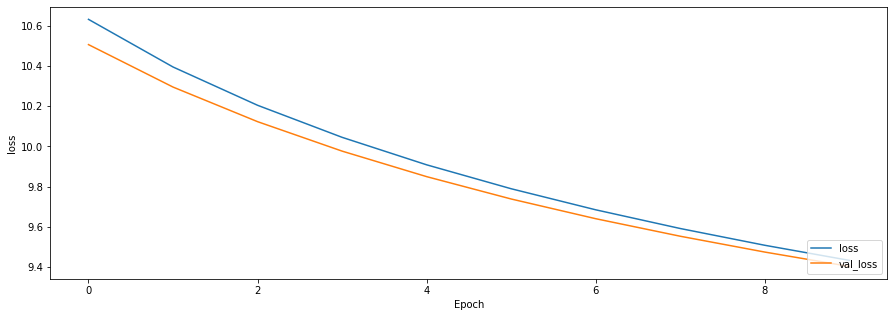

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(train_loss, label='loss')
plt.plot(val_loss, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

plt.show()